<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/StudentAdmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/Udacity/Dataset/")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split

#**Loading The Data**

In [3]:
student = pd.read_csv('student_data.csv')
type(student)

pandas.core.frame.DataFrame

In [4]:
student.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
student.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
student['rank'].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

#**One Hot Encoding**

In [7]:
# Make dummy variables for rank
student = pd.concat([student, pd.get_dummies(student['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
student = student.drop('rank', axis=1)

In [8]:
# Print the first 5 rows of our data
student.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [9]:
student.shape

(400, 7)

In [10]:
X = student[student.columns.difference(['admit'])]
Y = student['admit']

#**Train Test Split**

In [11]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(400, 6) (360, 6) (40, 6)
(400,) (360,) (40,)


#**Binarization**

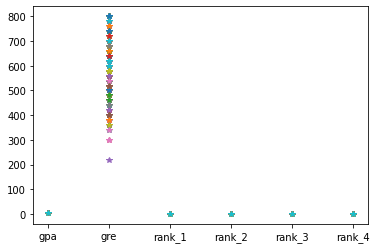

In [12]:
plt.plot(X_train.T,'*')
plt.xticks()
plt.show()

In [13]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels=[0,1])
X_binarised_test = X_test.apply(pd.cut,bins = 2, labels=[0,1])

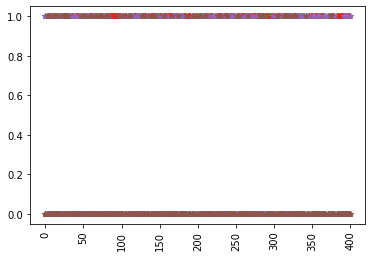

In [14]:
plt.plot(X_binarised_train,'*')
plt.xticks(rotation='vertical')
plt.show()

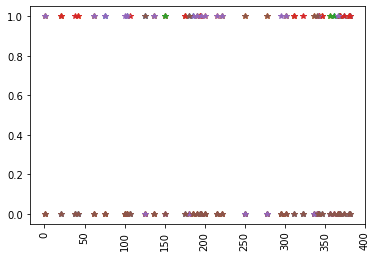

In [15]:
plt.plot(X_binarised_test,'*')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [18]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#**Model Building**

In [19]:
b = 3
i = 10 
if(np.sum(X_binarised_train[100,:])>=b):
  print("MP nuron inference is : 1 ")
else:
   print("MP nuron inference is 0")

if(Y_train[i]==1):
  print("Ground Truth is 1")
else:
  print("Ground Truth is 0")

MP nuron inference is 0
Ground Truth is 0


In [20]:
b = 3
i = np.random.randint(0,X_binarised_train.shape[0])

print("For row i : ",i)
if(np.sum(X_binarised_train[100,:])>=b):
  print("MP nuron inference is : 1 ")
else:
   print("MP nuron inference is 0")

if(Y_train[i]==1):
  print("Ground Truth is 1")
else:
  print("Ground Truth is 0")

For row i :  23
MP nuron inference is 0
Ground Truth is 0


In [21]:
b = 3
y_pred_train = []
accurate_rows = 0
for x, y in zip(X_binarised_train,Y_train):
  y_pred = np.sum(x)>=b
  y_pred_train.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_train.shape[0])

Accuracy is :  0.5555555555555556


In [22]:
for b in range(X_binarised_train.shape[1]+1):
  y_pred_train = []
  accurate_rows = 0
  for x, y in zip(X_binarised_train,Y_train):
    y_pred = np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows += (y_pred == y) 
  print("b = ",b," Accuracy is : ", accurate_rows/X_binarised_train.shape[0])

b =  0  Accuracy is :  0.31666666666666665
b =  1  Accuracy is :  0.31666666666666665
b =  2  Accuracy is :  0.4
b =  3  Accuracy is :  0.5555555555555556
b =  4  Accuracy is :  0.6833333333333333
b =  5  Accuracy is :  0.6833333333333333
b =  6  Accuracy is :  0.6833333333333333


In [23]:
b = 4
y_pred_test = []
accurate_rows = 0
for x, y in zip(X_binarised_test,Y_test):
  y_pred = np.sum(x)>=b
  y_pred_test.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_test.shape[0])

Accuracy is :  0.675


#**Model Building Using Class**

In [24]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [25]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 4
Highest accuracy is 0.6833333333333333


In [26]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)
print(accuracy_test)

0.675
